# Final Project: PanClassif

Import libraries

In [1]:
# import panclassif as pc
import pandas as pd
import numpy as np
from panclassif.panclassif import dataProcess, featSelect, upsampled, binary_merge, multi_merge, classification
from sklearn.ensemble import RandomForestClassifier

### Feature Selection

In [2]:
homepath_rare = './rare_data'
cancerpath_rare = './rare_data/cancer'
normalpath_rare = './rare_data/normal'

In [3]:
names_rare = featSelect(homepath_rare,cancerpath_rare,normalpath_rare, k=5)

Cancer files: ['SARC.csv.gz', 'PCPG.csv.gz', 'THYM.csv.gz', 'KICH.csv.gz', 'CHOL.csv.gz']
Normal files: ['PCPG.norm.csv.gz', 'THYM.norm.csv.gz', 'CHOL.norm.csv.gz', 'KICH.norm.csv.gz', 'SARC.norm.csv.gz']
Feature selection process is running...
Processing file index: 0
Doing feature selection for CHOL
Processing file index: 1
Doing feature selection for KICH
Processing file index: 2
Doing feature selection for PCPG
Processing file index: 3
Doing feature selection for SARC
Processing file index: 4
Doing feature selection for THYM
Feature selection process has ended



In [4]:
names_rare

['CHOL', 'KICH', 'PCPG', 'SARC', 'THYM']

In [5]:
homepath_common = './common_data/'
cancerpath_common = './common_data/cancer'
normalpath_common = './common_data/normal'

In [6]:
names_common = featSelect(homepath_common,cancerpath_common,normalpath_common, k=5)

Cancer files: ['BRCA.csv.gz', 'LUAD.csv.gz', 'COAD.csv.gz', 'STAD.csv.gz', 'LUSC.csv.gz', 'KIRP.csv.gz', 'PRAD.csv.gz', 'UCEC.csv.gz', 'READ.csv.gz']
Normal files: ['LUAD.norm.csv.gz', 'READ.norm.csv.gz', 'STAD.norm.csv.gz', 'UCEC.norm.csv.gz', 'COAD.norm.csv.gz', 'LUSC.norm.csv.gz', 'BRCA.norm.csv.gz', 'PRAD.norm.csv.gz', 'KIRP.norm.csv.gz']
Feature selection process is running...
Processing file index: 0
Doing feature selection for BRCA
Processing file index: 1
Doing feature selection for COAD
Processing file index: 2
Doing feature selection for KIRP
Processing file index: 3
Doing feature selection for LUAD
Processing file index: 4
Doing feature selection for LUSC
Processing file index: 5
Doing feature selection for PRAD
Processing file index: 6
Doing feature selection for READ
Processing file index: 7
Doing feature selection for STAD
Processing file index: 8
Doing feature selection for UCEC
Feature selection process has ended



In [7]:
names_common

['BRCA', 'COAD', 'KIRP', 'LUAD', 'LUSC', 'PRAD', 'READ', 'STAD', 'UCEC']

### Data Process

In [8]:
smoothed_cancer_rare = './rare_data/cancer_smoothed'
smoothed_normal_rare = './rare_data/normal_smoothed'

In [9]:
dataProcess(homepath=homepath_rare,
            names=names_rare,
            cancerpath=cancerpath_rare,
            smoothed_cancer=smoothed_cancer_rare,
            smoothed_normal=smoothed_normal_rare,
            scale_mode=0,
            cancer='CHOL')

Data process is running
Unique genes: 25
CHOL
(45, 25)
(9, 25)
KICH
(91, 25)
(25, 25)
PCPG
(187, 25)
(3, 25)
SARC
(265, 25)
(2, 25)
THYM
(122, 25)
(2, 25)
Data process has ended



In [10]:
smoothed_cancer_common = './common_data/cancer_smoothed'
smoothed_normal_common = './common_data/normal_smoothed'

In [11]:
dataProcess(homepath=homepath_common,
            names=names_common,
            cancerpath=cancerpath_common,
            smoothed_cancer=smoothed_cancer_common,
            smoothed_normal=smoothed_normal_common,
            scale_mode=0,
            cancer='BRCA')

Data process is running
Unique genes: 45
BRCA
(1212, 45)
(112, 45)
COAD
(328, 45)
(26, 45)
KIRP
(323, 45)
(32, 45)
LUAD
(576, 45)
(58, 45)
LUSC
(552, 45)
(51, 45)
PRAD
(550, 45)
(52, 45)
READ
(105, 45)
(6, 45)
STAD
(450, 45)
(32, 45)
UCEC
(201, 45)
(7, 45)
Data process has ended



Upsampling

In [12]:
upsampled(names_rare, homepath_rare)

Upsampling on train data is running
Upsampling on train data has ended



In [13]:
upsampled(names_common, homepath_common)

Upsampling on train data is running
Upsampling on train data has ended



Binary merge

In [14]:
binary_merge(names_rare, homepath_rare)

Merging for binary has started
Merging for binary has ended



In [15]:
binary_merge(names_common, homepath_common)

Merging for binary has started
Merging for binary has ended



Multi-merge

In [16]:
multi_merge(names_rare, homepath_rare)

Merging for multiclass has started
Merging for multiclass has ended



In [17]:
multi_merge(names_common, homepath_common)

Merging for multiclass has started
Merging for multiclass has ended



Binary Classification

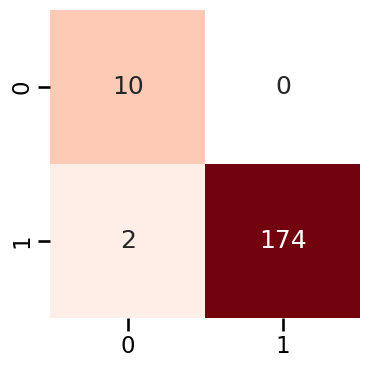

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.99      0.99       176

    accuracy                           0.99       186
   macro avg       0.92      0.99      0.95       186
weighted avg       0.99      0.99      0.99       186

MCC Score:  0.9076693430779935


<Figure size 640x480 with 0 Axes>

In [18]:
classification(homepath_rare, RandomForestClassifier(n_estimators=100), mode="binary", save_model="RF")

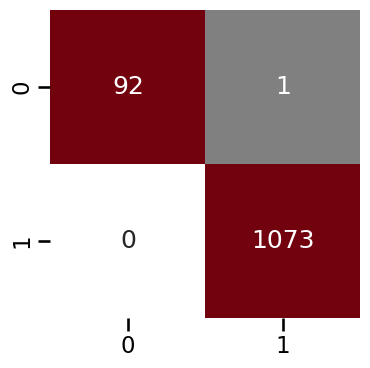

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        93
           1       1.00      1.00      1.00      1073

    accuracy                           1.00      1166
   macro avg       1.00      0.99      1.00      1166
weighted avg       1.00      1.00      1.00      1166

MCC Score:  0.9941459776840801


<Figure size 640x480 with 0 Axes>

In [19]:
classification(homepath_common, RandomForestClassifier(n_estimators=100), mode="binary", save_model="RF")

Multi-classification

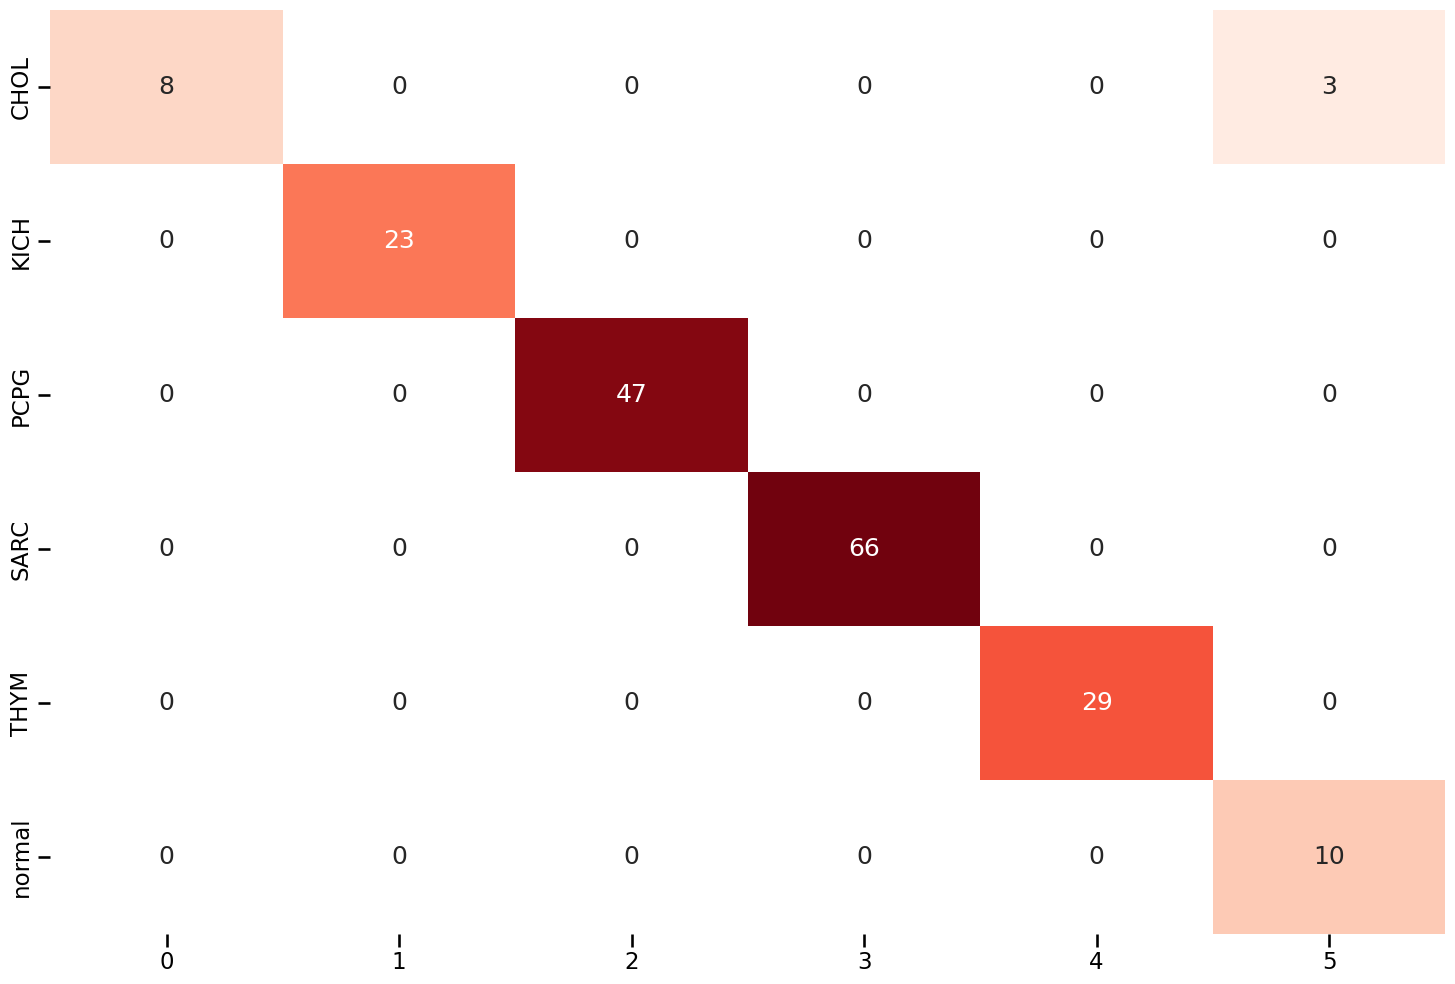

              precision    recall  f1-score   support

        CHOL       1.00      0.73      0.84        11
        KICH       1.00      1.00      1.00        23
        PCPG       1.00      1.00      1.00        47
        SARC       1.00      1.00      1.00        66
        THYM       1.00      1.00      1.00        29
      normal       0.77      1.00      0.87        10

    accuracy                           0.98       186
   macro avg       0.96      0.95      0.95       186
weighted avg       0.99      0.98      0.98       186

MCC Score:  0.9792313182567516


<Figure size 640x480 with 0 Axes>

In [20]:
classification(homepath_rare, RandomForestClassifier(n_estimators=100), mode="multi", save_model="RF")

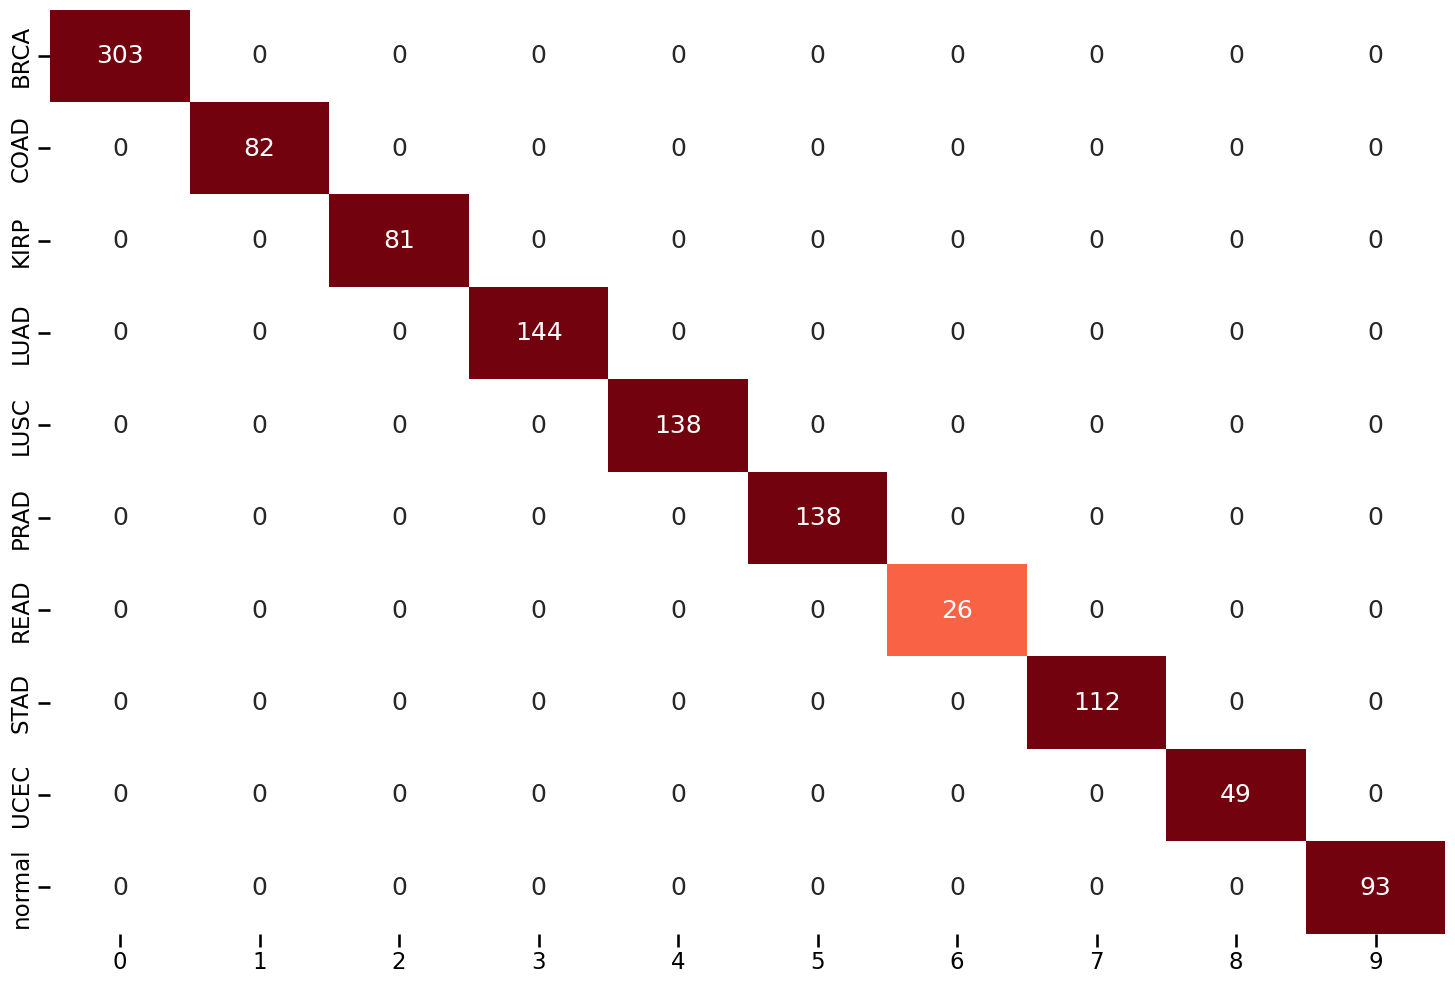

              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00       303
        COAD       1.00      1.00      1.00        82
        KIRP       1.00      1.00      1.00        81
        LUAD       1.00      1.00      1.00       144
        LUSC       1.00      1.00      1.00       138
        PRAD       1.00      1.00      1.00       138
        READ       1.00      1.00      1.00        26
        STAD       1.00      1.00      1.00       112
        UCEC       1.00      1.00      1.00        49
      normal       1.00      1.00      1.00        93

    accuracy                           1.00      1166
   macro avg       1.00      1.00      1.00      1166
weighted avg       1.00      1.00      1.00      1166

MCC Score:  1.0


<Figure size 640x480 with 0 Axes>

In [21]:
classification(homepath_common, RandomForestClassifier(n_estimators=100), mode="multi", save_model="RF")

Gene enrichment check

In [22]:
# gsea(homepath_rare)